In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Section 2.2

## Exercise 2.1

In [ ]:
xi = 0.005
sigma = 0.05

m1 = 100
m2 = 1000
m3 = 10000
eps = np.random.normal(size=m3)
R1 = np.exp(xi+sigma*eps[:m1])-1
R2 = np.exp(xi+sigma*eps[:m2])-1
R3 = np.exp(xi+sigma*eps)-1

# theoretical values
print(np.exp(xi + 0.5 * sigma**2)-1)
print(np.exp(xi + 0.5 * sigma**2)*np.sqrt(np.exp(sigma**2) - 1))

# simulated values
print(np.mean(R1), np.mean(R2), np.mean(R3))
print(np.std(R1), np.std(R2), np.std(R3))

0.006269572003761992
0.05034494090854318
0.004844023735673695 0.0038784473576364046 0.005831923224707375
0.04823652245532138 0.04932223919014895 0.05025515035212742


## Exercise 2.2

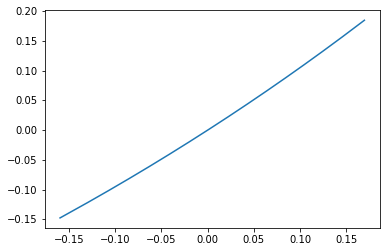

In [ ]:
from scipy.stats import norm
xi = 0.005
sigma = 0.05
n = 1000
u = (np.arange(n) + 0.5)/n

q1 = xi+sigma*norm.ppf(u)
q2 = np.exp(xi+sigma*norm.ppf(u))-1

plt.plot(q1, q2)
plt.show()

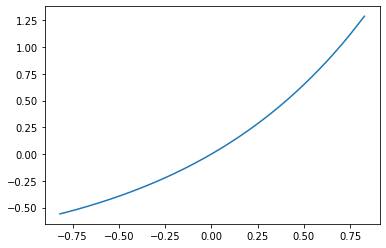

In [ ]:
sigma = 0.25
q1 = xi+sigma*norm.ppf(u)
q2 = np.exp(xi+sigma*norm.ppf(u))-1

plt.plot(q1, q2)
plt.show()

## Exercise 2.4

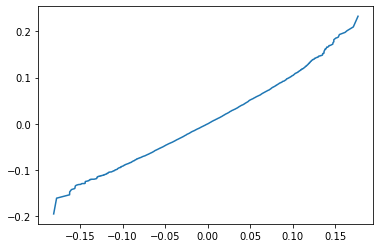

In [ ]:
xi = 0.005
sigma = 0.05
m = 10000

X_star = xi+sigma*norm.rvs(size=m)
Y_star = np.exp(xi+sigma*norm.rvs(size=m))-1

plt.plot(sorted(X_star), sorted(Y_star))
plt.show()

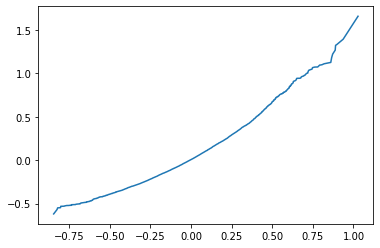

In [ ]:
sigma = 0.25
X_star = xi+sigma*norm.rvs(size=m)
Y_star = np.exp(xi+sigma*norm.rvs(size=m))-1

plt.plot(sorted(X_star), sorted(Y_star))
plt.show()

## Exercise 2.5

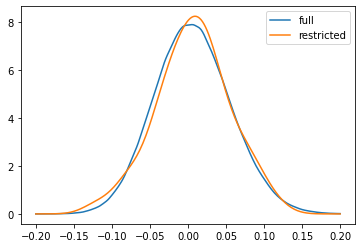

In [ ]:
from scipy.stats import kde

xi = 0.005
sigma = 0.05

m = 1000000
eps = norm.rvs(size=m)
R = np.exp(xi+sigma*eps)-1

density = kde.gaussian_kde(R)
x = np.linspace(-0.2, 0.2, 200)
y = density(x)
plt.plot(x, y, label='full')

density1 = kde.gaussian_kde(R[:100])
y1 = density1(x)
plt.plot(x, y1, label='restricted')
plt.legend()
plt.show()



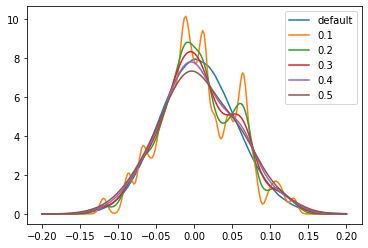

In [ ]:
bandwidth = [0.1, 0.2, 0.3, 0.4, 0.5]
x = np.linspace(-0.2, 0.2, 200)

density = kde.gaussian_kde(R)
y = density(x)
plt.plot(x, y, label='default')

density = [kde.gaussian_kde(R[:100], bw_method=bw) for bw in bandwidth]
for i, bw in enumerate(bandwidth):
  y = density[i](x)
  plt.plot(x, y, label=bw)
plt.legend()
plt.show()

## Exercise 2.6

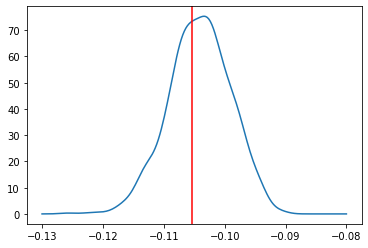

In [ ]:
xi = 0.005
sigma = 0.05
yps = 0.01

m = 1000
mb = 1000

eps = np.random.normal(size=(m,mb))
R = np.exp(xi+sigma*eps)-1
q = np.sort(R)[:, int(yps*m)]

x = np.linspace(-0.13, -0.08, 200)
density = kde.gaussian_kde(q)
y = density(x)
plt.plot(x, y)
plt.axvline(x=np.exp(xi+sigma*norm.ppf(yps))-1, color='red')
plt.show()

## Exercise 2.9

In [ ]:
xi = 0.005
sigma = 0.05

n1 = 100
n2 = 10000
n3 = 1000000

eps = np.random.normal(size=n3)
X1 = np.exp(xi+sigma*eps[:n1])
X2 = np.exp(xi+sigma*eps[:n2])
X3 = np.exp(xi+sigma*eps)

print(np.exp(4*sigma**2)+2*np.exp(3*sigma**2)+3*np.exp(2*sigma**2)-6)
print(np.mean(np.power(X1-np.mean(X1), 4))/(np.var(X1))**2-3)
print(np.mean(np.power(X2-np.mean(X2), 4))/(np.var(X2))**2-3)
print(np.mean(np.power(X3-np.mean(X3), 4))/(np.var(X3))**2-3)


0.04014412055143879
0.4050980178603498
0.15274479338225477
0.034515389707492794


In [ ]:
xi = 0
sigma = 1
X1 = np.exp(xi+sigma*eps[:n1])
X2 = np.exp(xi+sigma*eps[:n2])
X3 = np.exp(xi+sigma*eps)
print(np.exp(4*sigma**2)+2*np.exp(3*sigma**2)+3*np.exp(2*sigma**2)-6)
print(np.mean(np.power(X1-np.mean(X1), 4))/(np.var(X1))**2-3)
print(np.mean(np.power(X2-np.mean(X2), 4))/(np.var(X2))**2-3)
print(np.mean(np.power(X3-np.mean(X3), 4))/(np.var(X3))**2-3)

110.93639217631153
36.257846370880145
56.26955108355349
114.53336944761007


# Section 2.3

## Exercise 2.10

In [ ]:
beta = 1
m1 = 100
m2 = 1000
m3 = 10000
m4 = 100000

U = np.random.random(size=m4)
X1 = beta*np.tan(np.pi*(U[:m1]-0.5))
X2 = beta*np.tan(np.pi*(U[:m2]-0.5))
X3 = beta*np.tan(np.pi*(U[:m3]-0.5))
X4 = beta*np.tan(np.pi*(U[:m4]-0.5))

print(np.mean(X1), np.mean(X2), np.mean(X3), np.mean(X4))

-3.9353839543538722 1.5278362004845483 1.7625191710819024 2.6776842290726646


## Exercise 2.12

In [ ]:
from scipy.stats import norm

xi = 0
sigma = 1
m = 10000
a = np.arange(1,4)

p = 1-norm.cdf(a, loc=xi, scale=sigma)
U = np.random.random(size=m)
X = [norm.ppf(1-p[i]+p[i]*U) for i in range(3)]

print(np.mean(X, axis=1))
print(np.std(X, axis=1))

[1.5263215 2.3742273 3.2839256]
[0.44825041 0.33921669 0.26625842]


# Section 2.4
## Exercise 2.18

mean: 0.9997845278011434


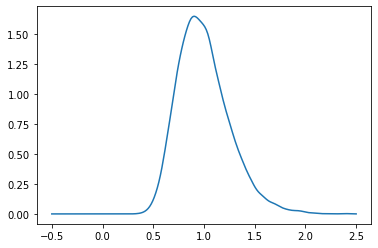

In [ ]:
from scipy.stats import kde

xi = 1
sigma = 0.25
m = 10000

eps = np.random.normal(size=m)
X = xi*np.exp(-sigma**2/2+sigma*eps)
print('mean:', np.mean(X))

density = kde.gaussian_kde(X)
x = np.linspace(-0.5, 2.5, 200)
y = density(x)
plt.plot(x, y)


mean: 1.0002338662862473


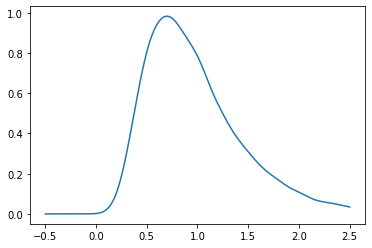

In [ ]:
sigma = 0.5
X = xi*np.exp(-sigma**2/2+sigma*eps)
print('mean:', np.mean(X))

density = kde.gaussian_kde(X)
x = np.linspace(-0.5, 2.5, 200)
y = density(x)
plt.plot(x, y)

mean: 1.0021311799462342


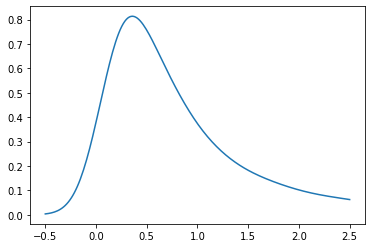

In [ ]:
sigma = 1
X = xi*np.exp(-sigma**2/2+sigma*eps)
print('mean:', np.mean(X))

density = kde.gaussian_kde(X)
x = np.linspace(-0.5, 2.5, 200)
y = density(x)
plt.plot(x, y)

## Exercise 2.19

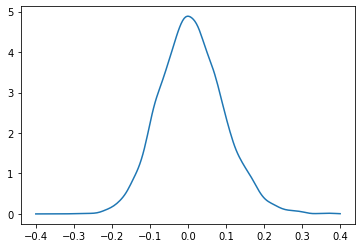

In [ ]:
from scipy.stats import gamma, norm


xi = 0.005
xi_sigma = 0.08
alpha = 10
m = 10000

eps = norm.rvs(size=m)
Z1 = 1/gamma.rvs(alpha, size=m, scale=1/alpha)
R1 = np.exp(xi+xi_sigma*np.sqrt(Z1)*eps)-1

density = kde.gaussian_kde(R1)
x = np.linspace(-0.4, 0.4, 200)
y = density(x)
plt.plot(x, y)

## Exercise 2.20

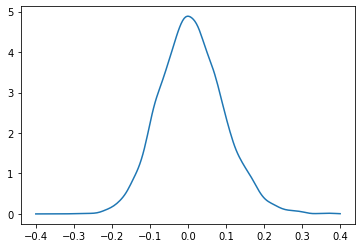

In [ ]:

xi = 0.005
xi_sigma = 0.08
alpha = 10
tau = np.sqrt(np.log(1+1/alpha))
m = 10000

eps = np.random.normal(size=m)
eta = np.random.normal(size=m)
Z2 = np.exp(0.5*tau**2+tau*eta)
R2 = np.exp(xi+xi_sigma*np.sqrt(Z2)*eps)-1


density = kde.gaussian_kde(R1)
x = np.linspace(-0.4, 0.4, 200)
y = density(x)
plt.plot(x, y)
plt.show()

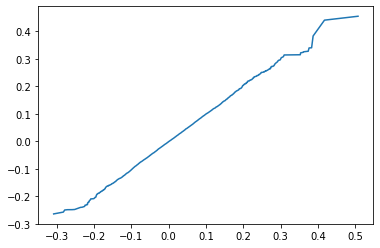

In [ ]:
plt.plot(sorted(R1), sorted(R2))

## Exercise 2.21

In [ ]:
xi = 0.05
sigma = 0.25
rho = [0, 0.6, 0.9]

m = 100000
eta1 = np.random.normal(size=m)
eta2 = np.random.normal(size=m)
eps1 = eta1 
eps2 = np.array([rho[i]*eta1+np.sqrt(1-rho[i]**2)*eta2 for i in range(3)])

R1 = np.exp(xi+sigma*eps1)-1
R2 = np.exp(xi+sigma*eps2)-1


Rcal = 0.5*(R1+R2)

print(np.mean(Rcal, axis=1))
print(np.std(Rcal, axis=1))

[0.08429065 0.08406965 0.08393683]
[0.19428213 0.24498444 0.26741124]


## Exercise 2.22

In [ ]:
from scipy.stats import gamma

xi = 0.05
xi_sigma = 0.25
alpha = 5
rho = [0,0.6,0.9]

m = 100000
eta1 = np.random.normal(size=m)
eta2 = np.random.normal(size=m)
eps1 = eta1 
eps2 = [rho[i]*eta1+np.sqrt(1-rho[i]**2)*eta2 for i in range(3)]
G = gamma.rvs(alpha, size=m, scale=1/alpha)
sigma = xi_sigma/np.sqrt(G)

R1 = np.exp(xi+sigma*eps1)-1
R2 = np.exp(xi+sigma*eps2)-1

Rcal1 = 0.5*(R1+R2[0])
Rcal2 = 0.5*(R1+R2[1])
Rcal3 = 0.5*(R1+R2[2])

print(np.mean(Rcal1), np.mean(Rcal2), np.mean(Rcal3))
print(np.std(Rcal1), np.std(Rcal2), np.std(Rcal3))

0.09390779657744129 0.09352385520375457 0.09305158243658057
0.22684786493275338 0.28476640919565566 0.3100275071809336


#Exercise 2.23

In [ ]:
xi = 0.05
sigma = 0.25
rho = [0, 0.6, 0.9]
J = 5
m = 10000

eps = np.random.normal(size=(m,J+1))
eps1 = np.sqrt(rho[0])*eps[:,0:1] + np.sqrt(1-rho[0])*eps[:,1:J+1]
R1 = np.exp(xi+sigma*eps1)-1
Rcal1 = np.mean(R1,axis=1)

eps2 = np.sqrt(rho[1])*eps[:,0:1] + np.sqrt(1-rho[1])*eps[:,1:J+1]
R2 = np.exp(xi+sigma*eps2)-1
Rcal2 = np.mean(R2,axis=1)

eps3 = np.sqrt(rho[2])*eps[:,0:1] + np.sqrt(1-rho[2])*eps[:,1:J+1]
R3 = np.exp(xi+sigma*eps3)-1
Rcal3 = np.mean(R3,axis=1)

print('mean:', np.mean(Rcal1), np.mean(Rcal2), np.mean(Rcal3))
print('std:', np.std(Rcal1), np.std(Rcal2), np.std(Rcal3))

mean: 0.08393365441539767 0.0857597081818457 0.08631239455811435
std: 0.1233840252685101 0.22378196824982471 0.26092466732258685


# Exercise 2.24

In [ ]:
xi = 0.05
sigma = 0.25
rho0 = 0.6
tau = [0, 0.5, 1]
m = 10000

eps = np.random.normal(size=(m,2))
eps = np.concatenate((eps, np.tile(eps[:, 1:2], (1,2))), axis=1)
eta = np.random.normal(size=m)
Z1 = np.exp(tau[0]*eta)
rho1 = ((1-rho0)*Z1-(1-rho0))/((1+rho0)*Z1+1-rho0)
eps[:,1] = rho1*eps[:,0]+np.sqrt(1-np.power(rho1,2))*eps[:,1]

Z2 = np.exp(tau[1]*eta)
rho2 = ((1-rho0)*Z2-(1-rho0))/((1+rho0)*Z2+1-rho0)
eps[:,2] = rho2*eps[:,0]+np.sqrt(1-np.power(rho2, 2))*eps[:,1]

Z3 = np.exp(tau[2]*eta)
rho3 = ((1-rho0)*Z3-(1-rho0))/((1+rho0)*Z3+1-rho0)
eps[:,3] = rho3*eps[:,0]+np.sqrt(1-np.power(rho3, 2))*eps[:,1]
R = np.exp(xi+sigma*eps)-1
Rcal1 = 0.5*(R[:,0]+R[:,1])
Rcal2 = 0.5*(R[:,0]+R[:,2])
Rcal3 = 0.5*(R[:,0]+R[:,3])

print('mean:', np.mean(Rcal1), np.mean(Rcal2), np.mean(Rcal3))
print('std:', np.std(Rcal1), np.std(Rcal2), np.std(Rcal3))

mean: 0.08307080659155507 0.08292876463400954 0.08280850003316316
std: 0.19027604161888145 0.18896769054942056 0.18580731170495382


# Section 2.5

# Exercise 2.25


In [ ]:
xi = 10
alpha = 4
m = 10000

G = gamma.rvs(alpha, size=m, scale=1/alpha)
X = xi*G

print(xi, np.mean(X))
print(xi/np.sqrt(alpha), np.std(X))


10 10.008506725126363
5.0 4.999747325688828


# Exercise 2.26

In [ ]:
from scipy.stats import gamma
import numpy as np


xi = 10
alpha = 4
a = [5, 15, 25]
m = 100000

In [ ]:
X = xi * gamma.rvs(alpha, size=m, scale=1/alpha)
X0 = X[X > a[0]] - a[0]
X1 = X[X > a[1]] - a[1]
X2 = X[X > a[2]] - a[2]

In [ ]:
print('acceptance:', float(len(X0))/m, float(len(X1))/m, float(len(X2))/m)
print(np.mean(X0), np.mean(X1), np.mean(X2))
print(np.std(X0), np.std(X1), np.std(X2))

acceptance: 0.85419 0.15101 0.00998
6.053707339618842 3.8347448665674766 3.295440375692355
4.600480479487391 3.5798071372136056 3.1745111059329694


In [ ]:
alpha = 1
X = xi * gamma.rvs(alpha, size=m, scale=1/alpha)
X0 = X[X > a[0]] - a[0]
X1 = X[X > a[1]] - a[1]
X2 = X[X > a[2]] - a[2]
print('acceptance:', float(len(X0))/m, float(len(X1))/m, float(len(X2))/m)
print(np.mean(X0), np.mean(X1), np.mean(X2))
print(np.std(X0), np.std(X1), np.std(X2))

acceptance: 0.60425 0.22089 0.08195
9.97992965780108 10.06589515193078 10.097337388478948
10.04117768547202 10.085813645953275 10.034361258967547


# Exercise 2.27

In [ ]:
xi = 10
alpha = 4
a = 5
b = [10, 15, 20]
m = 100000

In [ ]:
X = xi * gamma.rvs(alpha, size=m, scale=1/alpha)
X0 = X[(X > a) & (X < b[0])]
X1 = X[(X > a) & (X < b[1])]
X2 = X[(X > a) & (X < b[2])]

In [ ]:
print('acceptance:',float(len(X0))/m, float(len(X1))/m, float(len(X2))/m)
print(np.mean(X0), np.mean(X1), np.mean(X2))
print(np.std(X0), np.std(X1), np.std(X2))

acceptance: 0.42423 0.70545 0.8138
7.517401934779921 9.3753631499259 10.39768192094822
1.408962673875513 2.6813192927326255 3.6468861031394026


# Exercise 2.29

In [ ]:
alpha = 2
beta = 1
m = 100000

In [ ]:
U = np.random.uniform(size=m)
X = beta * np.power(-np.log(U), 1/alpha)

In [ ]:
X_sorted = sorted(X)
med = X_sorted[int(0.5 * m)]
qd = X_sorted[int(0.75 * m)] - X_sorted[int(0.25 * m)]

In [ ]:
print(beta * np.power(np.log(2), 1/alpha), med)
print(beta * (np.power(np.log(4), 1/alpha)-np.power(np.log(4)-np.log(3), 1/alpha)), qd)

0.8325546111576977 0.8325262435228936
0.6410500012128232 0.6405696043821102


# Exercise 2.30

In [ ]:
from scipy.stats import weibull_min, kde

beta = 1
alpha = [2, 3.6, 5]
m = 10000


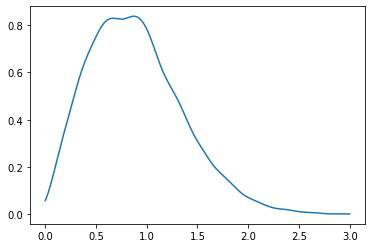

In [ ]:
X0 = weibull_min.rvs(alpha[0], scale=beta, size=m)
density0 = kde.gaussian_kde(X0)
x = np.linspace(0.0, 3.0, 200)
y0 = density0(x)
plt.plot(x, y0)

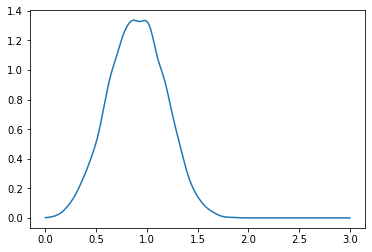

In [ ]:
X1 = weibull_min.rvs(alpha[1], scale=beta, size=m)
density1 = kde.gaussian_kde(X1)
x = np.linspace(0.0, 3.0, 200)
y1 = density1(x)
plt.plot(x, y1)

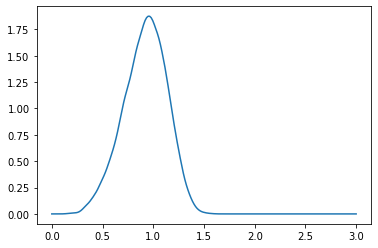

In [ ]:
X2 = weibull_min.rvs(alpha[2], scale=beta, size=m)
density2 = kde.gaussian_kde(X2)
x = np.linspace(0.0, 3.0, 200)
y2 = density2(x)
plt.plot(x, y2)

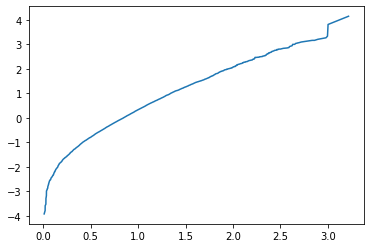

In [ ]:
Y = np.random.normal(size=m)
plt.plot(sorted(X0), sorted(Y))

# Exercise 2.31

In [ ]:
alpha = 2
beta = 1
m = 10000

In [ ]:
U = np.random.uniform(size=m)
X = beta * np.power(-np.log(U), -1/alpha)

In [ ]:
X_sorted = sorted(X)
med = X_sorted[int(0.5 * m)]
qd = X_sorted[int(0.75 * m)] - X_sorted[int(0.25 * m)]
print(beta * np.power(np.log(2), -1/alpha), med)
print(beta * np.power(np.log(4) - np.log(3), -1/alpha)-beta * np.power(np.log(4), -1/alpha), qd)

1.2011224087864498 1.1749774213933124
1.0150975454553706 0.9990845378772046
